In [20]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the data

In [7]:
df = pd.read_csv("hdfc_silver_etf.csv")
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,HDFCSILVER.NS,HDFCSILVER.NS,HDFCSILVER.NS,HDFCSILVER.NS,HDFCSILVER.NS
1,Date,NaN,NaN,NaN,NaN,NaN
2,2024-03-26,72.77999877929688,73.80000305175781,72.18000030517578,73.80000305175781,238930
3,2024-03-27,72.3499984741211,72.69999694824219,72.0999984741211,72.69999694824219,149652
4,2024-03-28,72.41999816894531,72.83999633789062,72.26000213623047,72.68000030517578,72244


In [8]:
#deleting the first 2 rows of the data
df = df.iloc[2:]
#Renaming the Price column as Date
df = df.rename(columns={"Price":"Date"})
df.head()

,Date,Close,High,Low,Open,Volume
2,2024-03-26,72.77999877929688,73.80000305175781,72.18000030517578,73.80000305175781,238930
3,2024-03-27,72.3499984741211,72.69999694824219,72.0999984741211,72.69999694824219,149652
4,2024-03-28,72.41999816894531,72.83999633789062,72.26000213623047,72.68000030517578,72244
5,2024-04-01,73.83000183105469,74.41999816894531,72.81999969482422,74.41999816894531,380923
6,2024-04-02,74.56999969482422,74.69000244140625,73.86000061035156,73.9000015258789,380708


In [9]:
#Converting the date column to a datetime object
df["Date"] = pd.to_datetime(df["Date"])

#Setting the date as the index
df.set_index("Date",inplace=True)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2024-03-26,72.77999877929688,73.80000305175781,72.18000030517578,73.80000305175781,238930
2024-03-27,72.3499984741211,72.69999694824219,72.0999984741211,72.69999694824219,149652
2024-03-28,72.41999816894531,72.83999633789062,72.26000213623047,72.68000030517578,72244
2024-04-01,73.83000183105469,74.41999816894531,72.81999969482422,74.41999816894531,380923
2024-04-02,74.56999969482422,74.69000244140625,73.86000061035156,73.9000015258789,380708


In [18]:
#Check for missing values
print(df.isnull().sum())

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 431 entries, 2024-03-26 to 2025-12-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   431 non-null    object
 1   High    431 non-null    object
 2   Low     431 non-null    object
 3   Open    431 non-null    object
 4   Volume  431 non-null    object
dtypes: object(5)
memory usage: 20.2+ KB


In [13]:
df.describe()

,Close,High,Low,Open,Volume
count,431,431,431,431,431
unique,395,396,397,395,431
top,85.54000091552734,88.5,80.51000213623047,82.5,238930
freq,3,3,4,4,1


In [15]:
#Setting the column datatype to numerical ones
numeric_cols = ["Open","High","Low","Close","Volume"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col],errors="coerce")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 431 entries, 2024-03-26 to 2025-12-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   431 non-null    float64
 1   High    431 non-null    float64
 2   Low     431 non-null    float64
 3   Open    431 non-null    float64
 4   Volume  431 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 20.2 KB


In [17]:
df.describe()

,Close,High,Low,Open,Volume
count,431.000000,431.000000,431.000000,431.000000,4.310000e+02
mean,102.421369,103.614037,101.337309,102.778585,1.727256e+06
std,26.857779,27.489261,26.101252,26.594159,3.046602e+06
min,72.349998,72.699997,72.099998,72.680000,6.826800e+04
25%,86.735001,87.489998,85.974998,87.084999,3.342785e+05
50%,92.269997,93.050003,91.500000,92.849998,5.757420e+05
75%,108.524998,109.169998,107.500000,108.590000,1.599814e+06
max,220.919998,225.020004,216.660004,216.660004,2.996264e+07


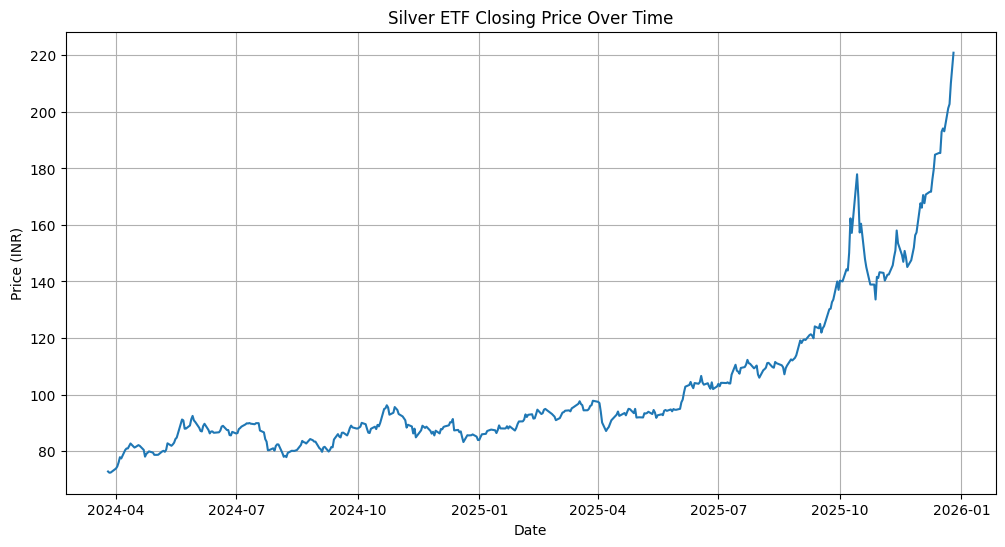

In [27]:
#Line plot of closing price over time:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.title('Silver ETF Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

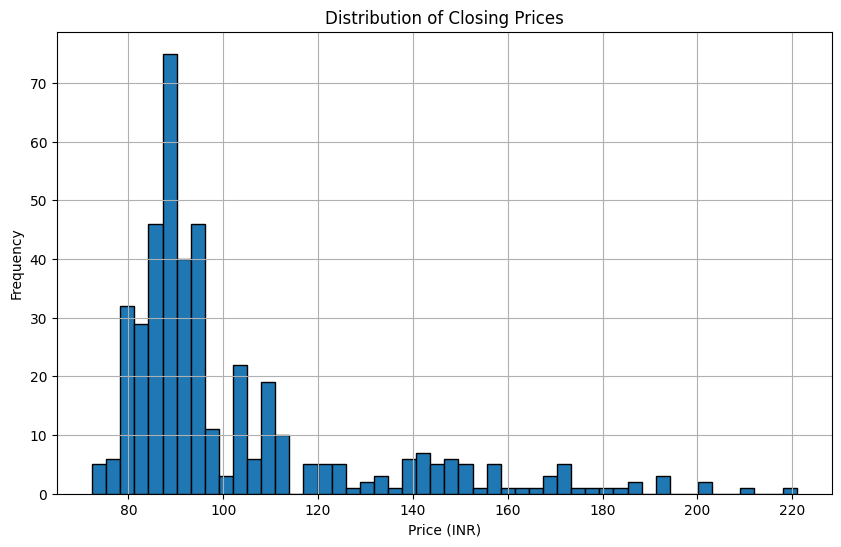

In [28]:
#Histogram of Closing Price Distribution:
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=50, edgecolor='black')
plt.title('Distribution of Closing Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

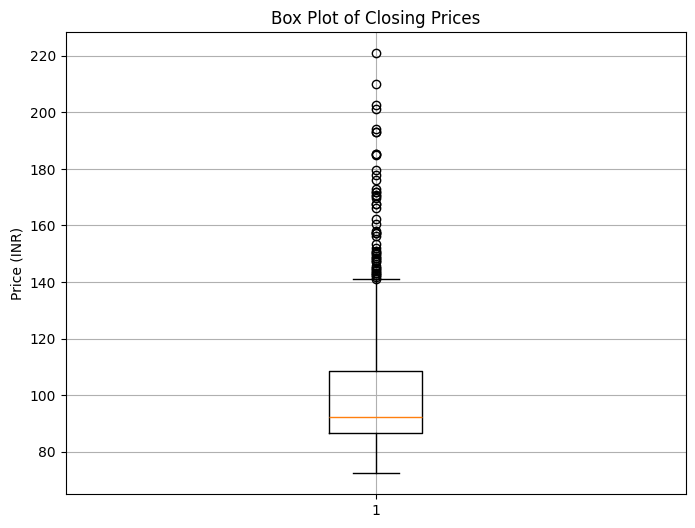

In [25]:
#Box Plot to Check for Outliers:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Close'])
plt.title('Box Plot of Closing Prices')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()